In [34]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import perf_counter


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


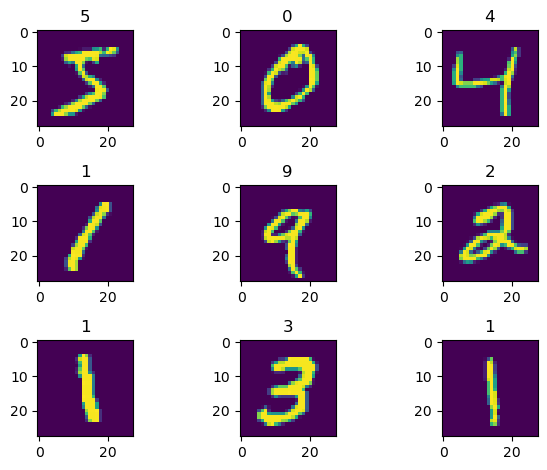

In [35]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [36]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [37]:
def sigmoid(s):
        return 1 / (1 + np.exp(-s))

def getLossFunction(theta):
    ans = 0
    for i in range(1, m):
        xi = Xtrain[i, :]
        yi = ytrain[i]
        res = 0
        res = np.dot(yi, xi.T)
        res = np.dot(res, theta)
        res = sigmoid(res)
        ans += np.log(res)
    return ans * (-1 / m)


def getGradient(theta):
    ans = 0
    for i in range(1, m):
        xi = Xtrain[i, :]
        yi = ytrain[i]
        res = 0
        res = np.dot(yi, xi.T)
        res = np.dot(res, theta)
        res = sigmoid(res)
        ans += (res - 1) * yi * xi
    return ans * (1 / m)


# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1, .1, n)
print (f'Check number: {getLossFunction(theta):.3f} {np.sum(getGradient(theta)):.3f}')

Check number: 45.192 12343.177


In [38]:
# Find classification accuracy given theta
def getAccuracy(X, y, theta):
    correct = 0
    m = X.shape[0]
    for i in range(1, m):
        xi = X[i, :]
        yi = y[i]
        res = 0
        res = np.dot(yi, xi.T)
        res = np.dot(res, theta)
        res = sigmoid(res)
        if res > 0.5:
            correct += 1
    return (correct / m) * 100


print(f'Train Accuracy: {getAccuracy(Xtrain, ytrain, theta):.2f}%')
print(f'Test Accuracy: {getAccuracy(Xtest, ytest, theta):.2f}%')


Train Accuracy: 49.54%
Test Accuracy: 49.27%


In [39]:
# Gradient descent
def gradientDescent(theta, alpha, num_iters):
    loss = []
    train_acc = []
    test_acc = []
    for i in range(num_iters):
        theta -= alpha * getGradient(theta)
        if (i % 10 == 0):
            loss.append(getLossFunction(theta))
            train_acc.append(getAccuracy(Xtrain, ytrain, theta))
            test_acc.append(getAccuracy(Xtest, ytest, theta))
    return theta, loss, train_acc, test_acc

alpha = 10 ** -6
num_iters = 1500
# theta = np.zeros(n)
start = perf_counter()
theta, loss, train_acc, test_acc = gradientDescent(theta, alpha, num_iters)
end = perf_counter()
print(f'Elapsed time: {end - start:.2f}s')

# For every value in train_acc and test_acc, divide it by 100 and subtract it from 1
train_acc = np.array([100 - x for x in train_acc])
test_acc = np.array([100 - x for x in test_acc])

Elapsed time: 177.37s


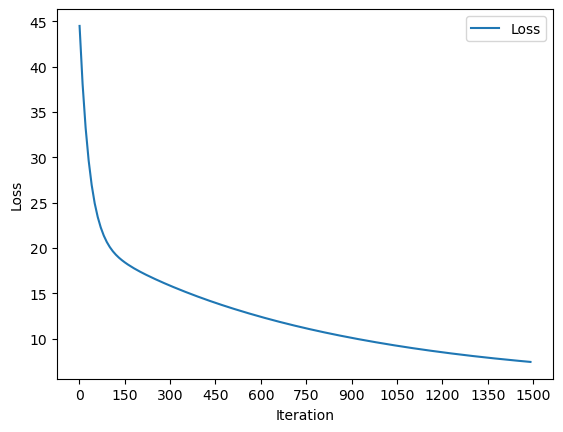

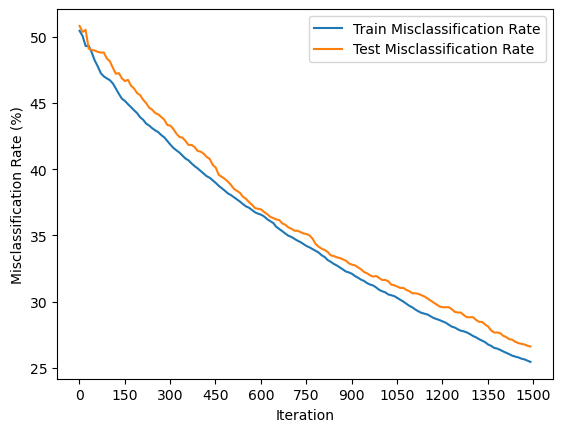

Final train misclassification rate: 25.45%
Final test misclassification rate: 26.62%


In [40]:
x_axis = np.arange(1, num_iters + 1, 10)
x_ticks = np.arange(0, num_iters + 1, num_iters // 10)
plt.plot(x_axis, loss, label='Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.xticks(x_ticks)
plt.show()
plt.plot(x_axis, train_acc, label='Train Misclassification Rate')
plt.plot(x_axis, test_acc, label='Test Misclassification Rate')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Misclassification Rate (%)')
plt.xticks(x_ticks)
plt.show()
print(f'Final train misclassification rate: {train_acc[-1]:.2f}%')
print(f'Final test misclassification rate: {test_acc[-1]:.2f}%')

In [41]:
def getStochGradient(theta, minibatch):
    ans = 0
    for i in minibatch:
        xi = Xtrain[i, :]
        yi = ytrain[i]
        res = 0
        res = np.dot(yi, xi.T)
        res = np.dot(res, theta)
        res = sigmoid(res)
        ans += (res - 1) * yi * xi
    return ans * 1 / len(minibatch)


# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1, .1, n)
print(np.sum(getStochGradient(theta, [1, 4, 6, 2])))


5803.5


In [42]:
def stochasticGradientDescent(theta, alpha, num_iters, batch_size):
    loss = []
    train_acc = []
    test_acc = []
    for i in range(num_iters):
        minibatch = np.random.choice(m, batch_size)
        theta -= alpha * getStochGradient(theta, minibatch)
        if (i % 100 == 0):
            loss.append(getLossFunction(theta))
            train_acc.append(getAccuracy(Xtrain, ytrain, theta))
            test_acc.append(getAccuracy(Xtest, ytest, theta))
    return theta, loss, train_acc, test_acc

alpha = 10 ** -6
num_iters = 50000
batch_size = 50
start = perf_counter()
theta, loss, train_acc, test_acc = stochasticGradientDescent(theta, alpha, num_iters, batch_size)
end = perf_counter()
print(f'Time elapsed: {end - start:.2f}s')

train_acc = np.array([100 - x for x in train_acc])
test_acc = np.array([100 - x for x in test_acc])

Time elapsed: 103.38s


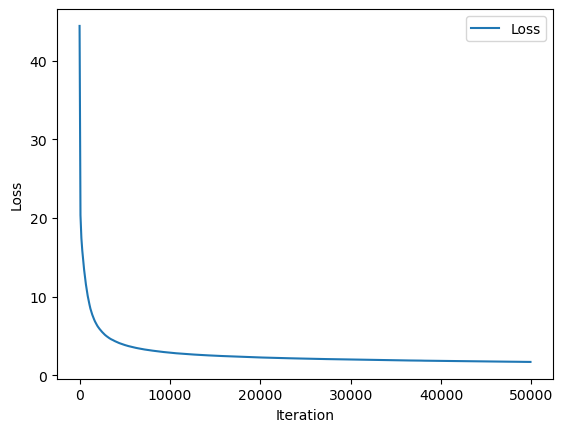

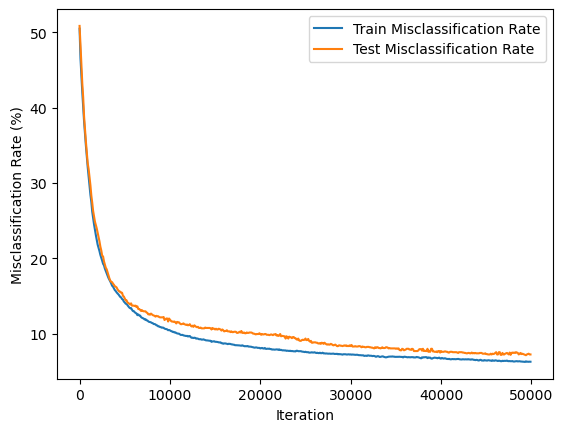

Final train misclassification rate: 6.27%
Final test misclassification rate: 7.23%


In [43]:
x_axis = np.arange(1, num_iters + 1, 100)
plt.plot(x_axis, loss, label='Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
plt.plot(x_axis, train_acc, label='Train Misclassification Rate')
plt.plot(x_axis, test_acc, label='Test Misclassification Rate')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Misclassification Rate (%)')
plt.show()
print(f'Final train misclassification rate: {train_acc[-1]:.2f}%')
print(f'Final test misclassification rate: {test_acc[-1]:.2f}%')